# MNIST Digit Generation using GANs

In [ ]:
!nvidia-smi

Sat Jul  3 07:39:49 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.27       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   35C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
!pip install cairosvg
!pip install natsort

In [ ]:
# Import dependencies
import torch
import torchvision
import os
import cv2
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torchvision.transforms as tt
from torchvision.transforms import Compose
from torchvision.utils import make_grid
import matplotlib.pyplot as plt
from torchvision.utils import save_image
from torch.nn.utils import spectral_norm
from tqdm.notebook import tqdm
import PIL
from PIL import Image
import cairosvg
import shutil
import io
from io import StringIO
import natsort
from torch.utils.data import Dataset
import random
%matplotlib inline


PIL.Image.MAX_IMAGE_PIXELS = 933120000

## Data cleaning

In [ ]:
# !gdown --id 13iMLQ-QSjIG-g3FEa_1gdytK0BLNsa7H
# !unzip floor_train.zip

In [ ]:
# Fine tune
!gdown --id 1j8TFOlCsq8J1fwMR4MTBDcNUIEFKrwkp
!unzip ./fine_tune.zip

In [ ]:
in_to_save = "./input_data"
out_to_save = "./output_data"

In [ ]:
input_path = "./Dataset/blackWhite"
output_path = "./Dataset/colorCoded"
!mkdir input_data
!mkdir output_data

In [ ]:
main_folder = os.listdir(input_path)
main_folder.remove('.DS_Store')
# main_folder.remove('.ipynb_checkpoints')

count=0
for sub_folder in main_folder:
    local_path= os.path.join(input_path,sub_folder)
    # print("local_path", local_path)

    for dir in os.listdir(local_path):
        in_path  = os.path.join(local_path, dir)
        # print(in_path)
        # in_path  = os.path.join(input_path, in_path)
        out_path = os.path.join(output_path,sub_folder)
        out_path = os.path.join(out_path, dir)
        # print(out_path)
        if os.path.isfile(in_path) and os.path.isfile(out_path):
            shutil.move(in_path , os.path.join(in_to_save , str(count) + dir[-5:]))
            shutil.move(out_path, os.path.join(out_to_save, str(count) + dir[-5:]))
            count+=1
            




In [ ]:
wrong_list = ["12736.svg", "12745.svg", "4541.svg"]


In [ ]:
def svg_to_png(path):
    print("Converting svg_to_png :")
    for dir in os.listdir(path):
        print(dir)
        if dir in wrong_list:
            continue
        try:
            in_svg = os.path.join(path, dir)
            if dir[-3] == "s" :
                to_save = os.path.join(to_path, dir[:-3]+"png")
                # print(in_svg)
                # print(to_save)
                cairosvg.svg2png( url=in_svg, write_to=to_save)
            else:
                shutil.move(in_svg, to_path)
        except:
            wrong_list.append(dir)
    print("Done")


In [ ]:
# '''Convert SVG to PNG'''
# Remove ./floor_train/color_coded/1bhk_37.svg
# ./train_output/svg987.jpg
# svg971.jpg
# svg903.jpg
# /svg921.jpg
# svg712.jpg
# /svg886.jpg

import cairosvg
import shutil
!mkdir train_input
# Convert input images
path = "./input_data"
to_path = "./train_input"
svg_to_png(path)

# Convert output images
!mkdir train_output
path = "./output_data"
to_path = "./train_output"
svg_to_png(path)



In [ ]:
 len(os.listdir("./train_output")),len(os.listdir("./train_input"))

(1881, 1886)

In [ ]:
# LOAD DIRECTLY
# !gdown --id 1-5BEz_Ul343gEZtCbSeNoDeJSV0h7w0Z
# !gdown --id 1umso1scO-DY0pR7SocBMMif08Zfxx9os
# !unzip ./train_input.zip
# !unzip ./train_output.zip

## Direct run

In [ ]:
!gdown --id 1umso1scO-DY0pR7SocBMMif08Zfxx9os
!gdown --id 1-5BEz_Ul343gEZtCbSeNoDeJSV0h7w0Z
!unzip train_input.zip
!unzip train_output.zip


def rgba_to_rgb(path):
    for dir in os.listdir(path):
        filename = os.path.join(path,dir)
        # print(Image.open(os.path.join("./inputs/train_input",dir)).convert("RGB").mode )
        if Image.open(filename).mode == "RGBA":
            png = Image.open(filename)
            png.load() # required for png.split()
            background = Image.new("RGB", png.size, (255, 255, 255))
            background.paste(png, mask=png.split()[3]) # 3 is the alpha channel
            background.save(filename, 'png', quality=80)

rgba_to_rgb("./content/train_input")
rgba_to_rgb("./content/train_output")


def check_rgba(path):
    count=0
    for dir in os.listdir(path):
        filename = os.path.join(path,dir)
        if Image.open(filename).mode == "RGBA":
            count+=1
    print(count)

print(check_rgba("./content/train_input"))
print(check_rgba("./content/train_output"))


len(os.listdir("./content/train_input")), len(os.listdir("./content/train_output"))

In [ ]:
# Blue  Room 
# !unzip /content/blue_room.zip
# in_path = "./content/yellow_room/input"
# out_path = "./content/yellow_room/output"

In [ ]:
# # isolate Blue  Room 
!gdown --id 1LDWirJREiqW8dWXjQRWqUMi7zROnW-Ra
!unzip /content/isolate_blue.zip
in_path = "./content/yellow_room/input"
out_path = "./content/yellow_room/output"
len(os.listdir(in_path)), len(os.listdir(out_path))

In [ ]:
# Custom dataset for zipping input and output images
class CustomDataSet(Dataset):
    def __init__(self, combine_dir, transform, transform_size=32):
        # One Folder with training inputs and outputs 
        self.combine_dir = combine_dir
        self.both_dir = os.listdir(combine_dir)
        self.transform = transform

        self.transform1 = Compose([ 
                        tt.Resize((transform_size,transform_size),interpolation=Image.ANTIALIAS),
                        tt.ToTensor(),
                        tt.Grayscale(1),
                        tt.Normalize(mean=(0.5,), std=(0.5,))])
        
        # Input - Output dir
        # self.input_dir = os.path.join(combine_dir, self.both_dir[0])
        # self.outut_dir = os.path.join(combine_dir, self.both_dir[1])
        self.input_dir =  in_path
        self.outut_dir =  out_path

        all_imgs = os.listdir(self.input_dir)
        all_imgs_2 = os.listdir(self.outut_dir)
        remove_from = ["/svg791.jpg","/svg765.jpg","/svg862.jpg","/svg4039.jpg", "/svg4055.jpg", "/svg943.jpg", "/svg4017.jpg", "/svg4055.jpg", "/svg740.jpg","/svg946.jpg", "/svg809.jpg","/svg4018.jpg", "/svg4031.jpg","/svg954.jpg","/svg994.jpg","/svg739.jpg", "/svg795.jpg","/svg741.jpg","/svg795.jpg","/svg841.png", "/svg786.jpg", "/svg4034.jpg", "/svg947.jpg", "/svg4023.jpg", "/svg987.jpg" , "/svg971.jpg" ,"/svg903.jpg" , "/svg921.jpg", "svg712.jpg" ,"/svg886.jpg" ,"/svg750.png" ,"/svg4015.png"]
        count=0
        for dir in all_imgs:
            if not dir in all_imgs_2:
                count+=1
                all_imgs.remove(dir)

            # if dir in ["/svg841.png", "/svg786.jpg", "/svg4034.jpg", "/svg947.jpg", "/svg4023.jpg"] or dir[-3] == "s" or dir[-4] == "s" or dir == "/svg987.jpg" or dir == "/svg971.jpg" or dir == "/svg903.jpg" or dir == "/svg921.jpg" or dir == "svg712.jpg" or dir == "/svg886.jpg" or dir == "/svg750.png" or dir == "/svg4015.png":
            if dir[-3] == "s" or dir[-4] == "s" or dir in remove_from:
                if dir in all_imgs:
                    count+=1
                    all_imgs.remove(dir)

        print(count)

        self.total_imgs = natsort.natsorted(all_imgs)

    def __len__(self):
        return len(self.total_imgs)

    def __getitem__(self, idx):
        # Load input images
        in_img_loc = os.path.join(self.input_dir, self.total_imgs[idx])
        input_image = Image.open(in_img_loc).convert("RGB")
        input_tensor = self.transform(input_image)

        # Load output images
        out_img_loc = os.path.join(self.outut_dir, self.total_imgs[idx])
        output_image = Image.open(out_img_loc).convert("RGB")
        # Change transforms with adding grayscale 
        output_tensor = self.transform1(output_image)

        # Manual horizontal flipping of both input and output with probability 0.5
        hflip = random.random() < 0.5
        if hflip:
            input_tensor = tt.functional.hflip(input_tensor)
            output_tensor = tt.functional.hflip(output_tensor)
        # Manual vertical flipping of both input and output with probability 0.5
        vflip = random.random() < 0.5
        if hflip:
            input_tensor = tt.functional.vflip(input_tensor)
            output_tensor = tt.functional.vflip(output_tensor)
      

        return input_tensor, output_tensor

In [ ]:
size = 64
dataset = CustomDataSet("./", 
                        transform=Compose([ 
                        tt.Resize((size,size),interpolation=Image.ANTIALIAS),
                        tt.ToTensor(),
                        tt.Normalize(mean=(0.5,), std=(0.5,))]),
                        transform_size=size)

# # For expansion
# dataset = CustomDataSet("./", 
#                         transform=Compose([ 
#                         tt.Resize((256,256),interpolation=Image.NEAREST),
#                         tt.ToTensor(),
#                         tt.Normalize(mean=(0.5,), std=(0.5,))]))

0


/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:281: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [ ]:
# Global variables 32 = 16*16
batch_size = 16*3
input_shape = (1,size,size)

In [ ]:
# Dowloading dataset and defining dataloader
train_loader = torch.utils.data.DataLoader(dataset,
                                           batch_size=batch_size,
                                           shuffle=True,
                                           num_workers=2,
                                           pin_memory=True)

In [ ]:
# Define function to display dataset
def denorm(img_tensor):
    return img_tensor*0.5 + 0.5

def show_images(images):
    fig, ax = plt.subplots(figsize=(12,12))
    ax.set_xticks([]); ax.set_yticks([]);
    print(images.shape)
    ax.imshow( make_grid( denorm(images.detach()[:64]), nrow=8).permute((1,2,0)))
    

def show_batch(data_loader):
    for images, _ in data_loader:
        show_images(images)
        return _

def show_output(data_loader):
    for _, images in data_loader:
        show_images(images)
        break;

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


torch.Size([48, 3, 64, 64])


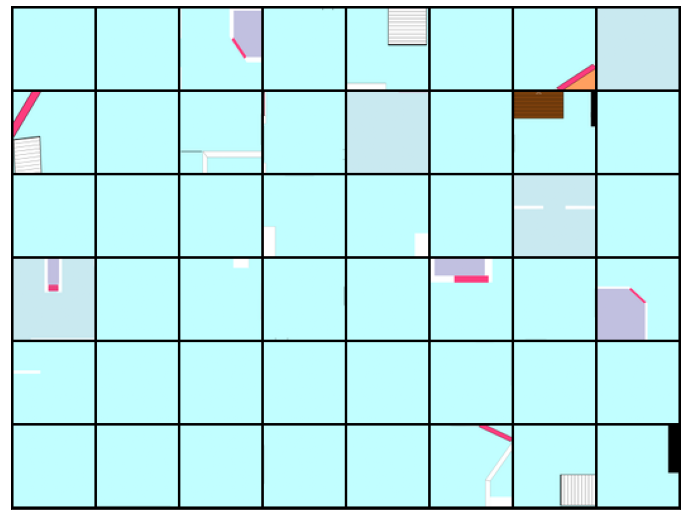

In [ ]:
# Display training samples
out_images = show_batch(train_loader)

torch.Size([48, 1, 64, 64])


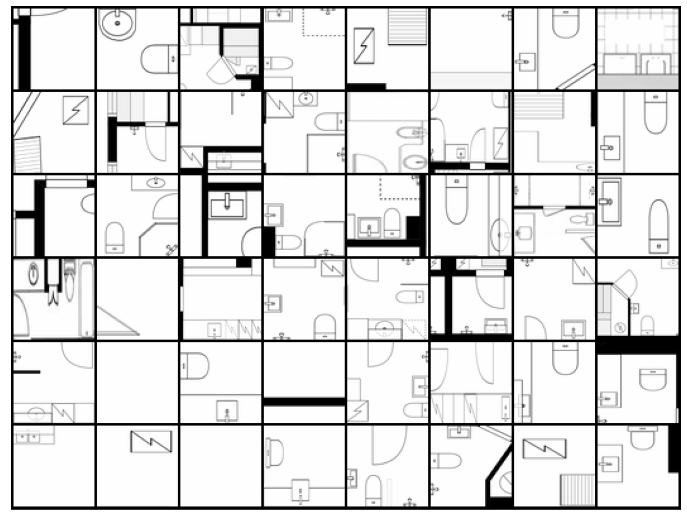

In [ ]:
show_images(out_images)

In [ ]:
for _,images in train_loader:
        print(images[0].min(),images[0].max())
        break;

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


tensor(-0.2393) tensor(0.9998)


In [ ]:
# Setup GPU configuration and DeviceDataLoader for efficient GPU memory usage
def get_default_device():
    return torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")

def to_device(data, device):
    ''' Loading data to device '''
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in  data]
    else:
        return data.to(device, non_blocking=True)

class DeviceDataLoader():
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
    
    def __iter__(self):
        for batch in self.dl:
            yield to_device(batch, self.device)

    def __len__(self):
        return len(self.dl)

# Implementing Generator

## ConvTranpose : 
## **out_size = (in_size - 1)*stride - 2*padding + (kernel_size - 1) + 1 **

In [ ]:
class Attention_block(nn.Module):
    def __init__(self,F_g,F_l,F_int):
        super(Attention_block,self).__init__()
        self.W_g = nn.Sequential(
            nn.Conv2d(F_g, F_int, kernel_size=1,stride=1,padding=0,bias=True),
            nn.BatchNorm2d(F_int)
            )
        
        self.W_x = nn.Sequential(
            nn.Conv2d(F_l, F_int, kernel_size=1,stride=1,padding=0,bias=True),
            nn.BatchNorm2d(F_int)
        )

        self.psi = nn.Sequential(
            nn.Conv2d(F_int, 1, kernel_size=1,stride=1,padding=0,bias=True),
            nn.BatchNorm2d(1),
            nn.Sigmoid()
        )
        
        self.relu = nn.ReLU(inplace=True)
        
    def forward(self,g,x):
        g1 = self.W_g(g)
        x1 = self.W_x(x)
        psi = self.relu(g1+x1)
        psi = self.psi(psi)

        return x*psi


In [ ]:
eps= 1e-12   #1e-4 
def snconv2d(eps=1e-12, **kwargs):
    return nn.utils.spectral_norm(nn.Conv2d(**kwargs), eps=eps)


class SelfAttn(nn.Module):
    """ Self attention Layer"""
    def __init__(self, in_channels, eps=1e-12):
        super(SelfAttn, self).__init__()
        self.in_channels = in_channels
        self.snconv1x1_theta = snconv2d(in_channels=in_channels, out_channels=in_channels//8,
                                        kernel_size=1, bias=False, eps=eps)
        self.snconv1x1_phi = snconv2d(in_channels=in_channels, out_channels=in_channels//8,
                                      kernel_size=1, bias=False, eps=eps)
        self.snconv1x1_g = snconv2d(in_channels=in_channels, out_channels=in_channels//2,
                                    kernel_size=1, bias=False, eps=eps)
        self.snconv1x1_o_conv = snconv2d(in_channels=in_channels//2, out_channels=in_channels,
                                         kernel_size=1, bias=False, eps=eps)
        self.maxpool = nn.MaxPool2d(2, stride=2, padding=0)
        self.softmax  = nn.Softmax(dim=-1)
        self.gamma = nn.Parameter(torch.zeros(1))

    def forward(self, x):
        _, ch, h, w = x.size()
        # Theta path
        theta = self.snconv1x1_theta(x)
        theta = theta.view(-1, ch//8, h*w)
        # Phi path
        phi = self.snconv1x1_phi(x)
        phi = self.maxpool(phi)
        phi = phi.view(-1, ch//8, h*w//4)
        # Attn map
        attn = torch.bmm(theta.permute(0, 2, 1), phi)
        attn = self.softmax(attn)
        # g path
        g = self.snconv1x1_g(x)
        g = self.maxpool(g)
        g = g.view(-1, ch//2, h*w//4)
        # Attn_g - o_conv
        attn_g = torch.bmm(g, attn.permute(0, 2, 1))
        attn_g = attn_g.view(-1, ch//2, h, w)
        attn_g = self.snconv1x1_o_conv(attn_g)
        # Out
        out = x + self.gamma*attn_g
        return out

In [ ]:
class UNet(torch.nn.Module):

  def unet_conv(self , ch_in , ch_out , is_leaky):
    if is_leaky:
      return nn.Sequential(
          nn.Conv2d(ch_in , ch_out , 3 , padding=1),
          nn.BatchNorm2d(ch_out),
          nn.LeakyReLU(0.2 , inplace=True)
      )
    else:
      return nn.Sequential(
          nn.Conv2d(ch_in , ch_out , 3 , padding=1),
          nn.BatchNorm2d(ch_out),
          nn.ReLU(True)
      )

  def up(self,ch_in,ch_out):
    return nn.Sequential(
                          # nn.ConvTranspose2d(ch_in , ch_out , 3, 2 , 1 ,1),
                          # nn.BatchNorm2d(ch_out),
                          # nn.PReLU()
                          nn.Conv2d(ch_in, ch_out*4, kernel_size=3, padding=1),
                          nn.BatchNorm2d(ch_out*4),
                          nn.PixelShuffle(upscale_factor=2),
                          nn.PReLU()
                          ,nn.Conv2d(ch_out , ch_out , 3 , padding=1),
                          nn.BatchNorm2d(ch_out),
                          nn.PReLU()
                          
    )
    
    # nn.Sequential(
    #     nn.ConvTranspose2d(ch_in , ch_out , 3, 2 , 1 ,1),
    #     # nn.BatchNorm2d(ch_out),
    #     nn.PReLU()
    #     )
    
  def pooling(self,ch_in,ch_out):
    return nn.Sequential(
        nn.Conv2d(ch_in, ch_out , kernel_size=2,stride=2, padding=0),
        nn.BatchNorm2d(ch_out),
        nn.ReLU(True)
    )
  
  def __init__(self,is_leaky, out_channel=1):
    super(UNet,self).__init__()

    #Residual connection in starting of u-net
    self.res1 = self.unet_conv(4 , 32 , is_leaky)
    self.res2 = self.unet_conv(32 , 32 , is_leaky)
    self.att_start = Attention_block(F_g=32,F_l=32,F_int=16)

    # First encoding layer
    self.conv1 = self.unet_conv(64,64, is_leaky)                    
    # Second encoding layer
    self.conv2 = self.unet_conv(64,128, is_leaky )                  
    # Third encoding layer
    self.conv3 = self.unet_conv(128,256, is_leaky)                 
    # Forth encoding layer
    self.conv4 = self.unet_conv(256,512, is_leaky)                 
    # Fifth encoding layer
    self.conv5 = self.unet_conv(512,1024, is_leaky)                 

    #Pooling layer
    self.pool1 =  self.pooling(64,64)  
    self.pool2 =  self.pooling(128,128)
    self.pool3 =  self.pooling(256,256)
    self.pool4 =  self.pooling(512,512)

    # First Upsampling layer  with attention blocks
    self.up1  = self.up(1024,512)                                  
    self.att1 = Attention_block(F_g=512,F_l=512,F_int=256)
   
    # Second Upsampling layer
    self.up2  = self.up(512,256)                                   
    self.att2 = Attention_block(F_g=256,F_l=256,F_int=128)
    # Third Upsampling layer
    self.up3  = self.up(256,128)                                     
    self.att3 = Attention_block(F_g=128,F_l=128,F_int=64)
    # Fourth Upsampling layer
    self.up4 = self.up(128,64)                                      
    self.att4 = Attention_block(F_g=64,F_l=64,F_int=32)
    self.self_att1 = SelfAttn(256)


    # First Decoding layer
    self.conv6 = self.unet_conv(1024, 512, False )
    # Second Decoding layer
    self.conv7 = self.unet_conv(512,  256, False )
    # Third Decoding layer 
    self.conv8 = self.unet_conv(256,  128, False  )
    # Fourth Decoding layer
    self.conv9 = self.unet_conv(128,  128, False  )

    self.self_att2 = SelfAttn(128)
    self.res_att = self.unet_conv(256, 128, False )
    
    # Residual connections in the end of u-net
    self.res3       = self.unet_conv(128 ,128, False )
    self.self_att3  = SelfAttn(128)
    self.res4       = self.unet_conv(128 ,128, False )
    self.att_end    = Attention_block(F_g=128,F_l=128,F_int=64)
    self.resEnd     = self.unet_conv(256 , 64, False  )


    #Last layer
    self.conv10 = nn.Conv2d(64, out_channel, kernel_size=1 , padding=0)                            

   
  def forward(self, x):

    #Residual connections
    r1 = self.res1(x)
    r2 = self.res2(r1)

    r1 = self.att_start(g=r2 , x=r1)

    #Encoding Path
    x1 = self.conv1( torch.cat( (r1 , r2), 1) )
    r1=[]
    r2=[]
    x2 = self.conv2(self.pool1(x1))
    x3 = self.conv3(self.pool2(x2))
    x4 = self.conv4(self.pool3(x3))
    x5 = self.conv5(self.pool4(x4))                            # out 2 x 2 x 1024

    
    #Decoding Path with attention
    x  = self.up1(x5)
    x5=[]
    x4 = self.att1(g=x , x=x4)
    x  = self.conv6( torch.cat(( x ,  x4 ),1 ) )
    x4=[]

    x  = self.up2(x)
    x  = self.self_att1(x)      
    x3 = self.att2(g=x , x=x3)
    x  = self.conv7( torch.cat(( x ,  x3 ), 1 ) )
    x3=[]

    x  = self.up3(x)
    x2 = self.att3(g=x , x=x2)
    x  = self.conv8( torch.cat(( x , x2 ), 1 ) )
    x2=[]

    x  = self.up4(x)
    x1 = self.att4(g=x , x=x1)                     
    x1 = self.conv9( torch.cat(( x , x1 ), 1 ) )
    # Self Attention
    x  = self.self_att2(x1)                             
    x  = self.res_att( torch.cat((x , x1 ), 1 ) )
    x1=[]

    #Residual in End
    r3 = self.res3(x)                  
    r3 = self.self_att3(r3)                           
    r4 = self.res4(r3)
    x  = self.att_end(g=r4 , x=x)
    x  = self.resEnd(torch.cat( (r4 , x), 1))          
    r4=[]
    r3=[]

    # x = self.conv10(x)
    x = self.conv10(x)
    m = nn.Tanh()
    x = m(x)

    return x

In [ ]:
# # Testing generator
# generator = UNet(True)
# for image, _ in train_loader:
#     print(image.shape)
#     out = generator(image)
#     print(out.shape)
#     show_images(out)
#     break

# Discriminator

In [ ]:
class DNet(nn.Module):
    def __init__(self, input_shape):
        super(DNet, self).__init__()

        self.input_shape = input_shape
        in_channels, in_height, in_width = self.input_shape
        patch_h, patch_w = int(in_height / 2 ** 4), int(in_width / 2 ** 4)
        self.output_shape = (1, patch_h, patch_w)

        def discriminator_block(in_filters, out_filters, second_block=False):
            layers = []
            layers.append(spectral_norm(nn.Conv2d(in_filters, out_filters, kernel_size=3, stride=1, padding=1)))
            # if not second_block:
                # layers.append(nn.BatchNorm2d(out_filters))
            layers.append(nn.LeakyReLU(0.1, inplace=True))
            layers.append(spectral_norm(nn.Conv2d(out_filters, out_filters, kernel_size=3, stride=2, padding=1)))
            # layers.append(nn.BatchNorm2d(out_filters))
            layers.append(nn.LeakyReLU(0.1, inplace=True))
            if second_block:
              layer_attention = SelfAttn(out_filters)
              layers.append(layer_attention)
            return layers

        layers = []
        in_filters = in_channels
        for i, out_filters in enumerate([64, 128, 256, 512]):
            layers.extend(discriminator_block(in_filters, out_filters, second_block=(i == 1)))
            in_filters = out_filters

        layers.append(nn.Conv2d(out_filters, 1, kernel_size=3, stride=1, padding=1))

        self.model = nn.Sequential(*layers)

    def forward(self, img):
        return self.model(img)

In [ ]:
# Testing discriminator
# discriminator = DNet(input_shape)
# for _,image in train_loader:
#     # out = generator(random_vector)
#     # print(out.shape)
#     out = discriminator(image.cpu())
#     print(out.shape)
#     break

In [ ]:
# discriminator.output_shape
# train_loader = DeviceDataLoader(train_loader, device)


In [ ]:
# Using GPU
device = get_default_device()
discriminator = DNet(input_shape)
generator = UNet(True,1)
generator.to(device)
discriminator.to(device)
train_loader = DeviceDataLoader(train_loader, device)

# Fixed variables
disc_out_shape = [1, 4, 4]
lambdaa = 100

# Save generator outputs
generated_dir = "generated"
os.makedirs(generated_dir, exist_ok=True)

def save_images(idx, show=True):
    for images, _ in train_loader:
        noise = torch.randn(images.shape).to(device)
        # Generate fake images
        gen_input = torch.cat((images, noise[:,0,:,:].unsqueeze(1)), 1)
        generated_images = generator(gen_input)
        fname = "generated-images-{0:0=4d}.png".format(idx)
        save_image(denorm(generated_images), os.path.join(generated_dir, fname), nrow=8)
        print("Saving", fname)
        if show:
            show_images(generated_images)
        break

In [ ]:
torch.randn((64,3,32,32))[:,0,:,:].unsqueeze(1).shape

torch.Size([64, 1, 32, 32])

In [ ]:
# Defining criterion for training
criterion_gan     = nn.MSELoss() 
criterion_content = nn.L1Loss()

# Training GANs
def train_gans(input_images, output_image, opt_g, opt_d):
    valid = torch.ones( input_images.shape[0], *disc_out_shape, device=device)
    fake  = torch.zeros(input_images.shape[0], *disc_out_shape, device=device)

    noise = torch.randn(input_images.shape).to(device)
    # Generate fake images
    gen_input = torch.cat((input_images, noise[:,0,:,:].unsqueeze(1)), 1)
    fake_images  = generator(gen_input)

    # Clear discriminator gradients
    opt_d.zero_grad()

    # Forward pass discriminator
    real_preds = discriminator(output_image)
    real_loss  = criterion_gan(real_preds, valid)
    real_score = torch.mean(real_loss.detach()).item()

    fake_preds = discriminator(fake_images.detach())
    fake_loss  = criterion_gan(fake_preds, fake)
    fake_score = torch.mean(fake_loss.detach()).item()

    # Backward pass and update discriminator weights
    d_loss = real_loss + fake_loss
    d_loss.backward()
    opt_d.step()

    # Clear generator gradients
    opt_g.zero_grad()

    # Forward pass generator|| Try to fool the discriminator
    preds   = discriminator(fake_images)               # Notice the valid tensor here, for fake_images
    g_loss1 = criterion_gan(preds, valid)
    content_loss = criterion_content(output_image, fake_images)
    
    # Updating generator weights
    g_loss = g_loss1 + lambdaa * content_loss
    g_loss.backward()
    opt_g.step()

    return g_loss.item(), d_loss.item(), real_score, fake_score


In [ ]:
def fit(epochs, lr, train_loader):
    torch.cuda.empty_cache()
    # Record variables
    start_idx = 1
    g_losses = []
    d_losses = []
    real_scores = []
    fake_scores = []

    
    # Begin Training
    for epoch in range(epochs):
        generator.train()
        discriminator.train()
        gloss, dloss, r_score, f_score = [], [], [], []
        # One Epoch
        for input_images, output_image in tqdm(train_loader):
            # Train GANs
            g, d, r, f = train_gans(input_images, output_image, opt_g, opt_d)
            # Record batch loss and scores
            gloss.append(g)
            dloss.append(d)
            r_score.append(r)
            f_score.append(f)
        
        # Record mean losses and Scores
        g_losses.append( torch.tensor(gloss).mean() )
        d_losses.append( torch.tensor(dloss).mean() )
        real_scores.append( torch.tensor(r_score).mean() )
        fake_scores.append( torch.tensor(f_score).mean() )

        # Log losses and scores
        print("Epoch [{}/{}], g_loss : {:.5f}, d_loss : {:.5f}, real_score : {:.5f}, fake_score : {:.5f}".format(epoch, epochs, g_losses[-1], d_losses[-1], real_scores[-1], fake_scores[-1]))

        # Save generators output
        save_images(epoch+start_idx, show=False)
        
    return g_losses, d_losses, real_scores, fake_scores


In [ ]:
epochs = 10
lr = 1e-4
# Optimizers
opt_g = torch.optim.Adam(generator.parameters(), lr=lr, betas=(0.5, 0.999))
opt_d = torch.optim.Adam(discriminator.parameters(), lr=lr, betas=(0.5, 0.999))


In [ ]:
# https://drive.google.com/file/d/17o4tdA0Q-jGZXgl5ccHCSBtfqW8iHcjM/view?usp=sharing

In [ ]:
!gdown --id 12B1jtiGFSs2QGqdhjP0O6Z04iyQsnDYC
checkpoint = torch.load("./floor_isolate_blue_64x9300.h5")
opt_g.load_state_dict(checkpoint["optimizer_g"])
opt_d.load_state_dict(checkpoint["optimizer_d"])
generator.load_state_dict(checkpoint["generator"])
discriminator.load_state_dict(checkpoint["discriminator"])

Downloading...
From: https://drive.google.com/uc?id=12B1jtiGFSs2QGqdhjP0O6Z04iyQsnDYC
To: /content/floor_isolate_blue_64x9300.h5
579MB [00:05, 101MB/s]


<All keys matched successfully>

In [ ]:
# opt_d.state_dict()

In [ ]:
history = fit(epochs, lr, train_loader)

In [ ]:
save_images(11, show=False)


In [ ]:
def change_lr(opt,lr):
    for g in opt.param_groups:
        g['lr'] = lr

lr = 2e-5
change_lr(opt_g, lr)
change_lr(opt_d, lr)
history += fit(1000, lr, train_loader)

In [ ]:
history += fit(2000, lr, train_loader)

In [ ]:
torch.save(generator.state_dict(), "generator2.pth")
torch.save(discriminator.state_dict(), "discriminator2.pth")

In [ ]:
states = {
            'epoch': epochs + 1,
            'generator': generator.state_dict(),
            'discriminator': discriminator.state_dict(),
            'optimizer_g': opt_g.state_dict(),
            'optimizer_d': opt_d.state_dict()
        }
torch.save(states, "./floor_isolate_blue_64x2300.h5")

In [ ]:
!mkdir test
test_dir = "./test"

def test_images(idx, show=True):
    for images, _ in train_loader:
        # images = images.cpu()
        noise = torch.randn(images.shape).to(device)
        # Generate fake images
        gen_input = torch.cat((images, noise[:,0,:,:].unsqueeze(1)), 1)
        generated_images = generator(gen_input)
        for i in range(generated_images.shape[0]):
            fname = "generated-images-{0:0=4d}.png".format(idx+i)
            if generated_images[i].min() + 0.2 >= generated_images[i].max():
                print("Empty")
                continue
            save_image(denorm(generated_images[i]), os.path.join(test_dir, fname), nrow=8)
            print("Saving", fname)
            if show:
                show_images(generated_images[i].detach().cpu())
        break

Saving generated-images-0000.png
torch.Size([1, 64, 64])
Empty
Saving generated-images-0002.png
torch.Size([1, 64, 64])
Empty
Saving generated-images-0004.png
torch.Size([1, 64, 64])
Empty
Saving generated-images-0006.png


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


torch.Size([1, 64, 64])
Empty
Empty
Empty
Saving generated-images-0010.png
torch.Size([1, 64, 64])
Empty
Empty
Saving generated-images-0013.png
torch.Size([1, 64, 64])
Saving generated-images-0014.png
torch.Size([1, 64, 64])
Saving generated-images-0015.png
torch.Size([1, 64, 64])
Empty
Saving generated-images-0017.png
torch.Size([1, 64, 64])
Empty
Empty
Empty
Saving generated-images-0021.png
torch.Size([1, 64, 64])
Empty
Empty
Saving generated-images-0024.png
torch.Size([1, 64, 64])
Empty
Empty
Empty
Empty
Empty
Empty
Empty
Saving generated-images-0032.png
torch.Size([1, 64, 64])
Saving generated-images-0033.png
torch.Size([1, 64, 64])
Saving generated-images-0034.png
torch.Size([1, 64, 64])
Empty
Empty
Empty
Saving generated-images-0038.png
torch.Size([1, 64, 64])
Saving generated-images-0039.png
torch.Size([1, 64, 64])
Saving generated-images-0040.png
torch.Size([1, 64, 64])
Saving generated-images-0041.png
torch.Size([1, 64, 64])
Saving generated-images-0042.png
torch.Size([1, 64, 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  


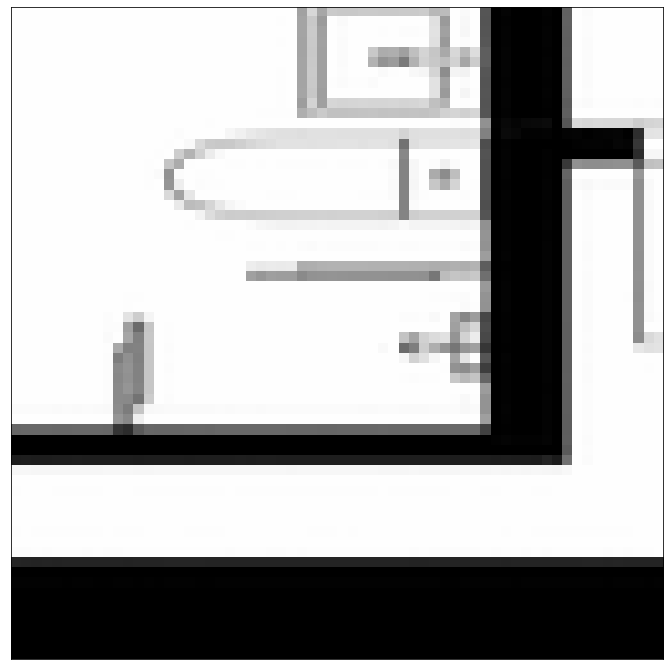

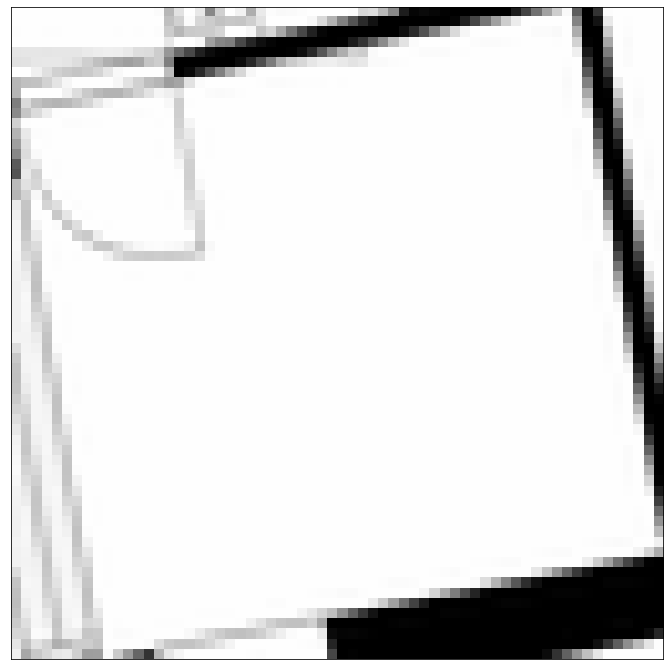

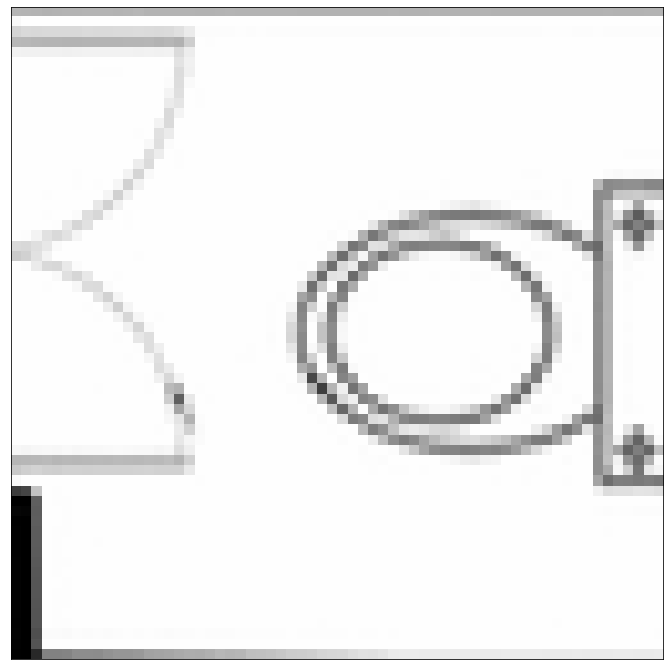

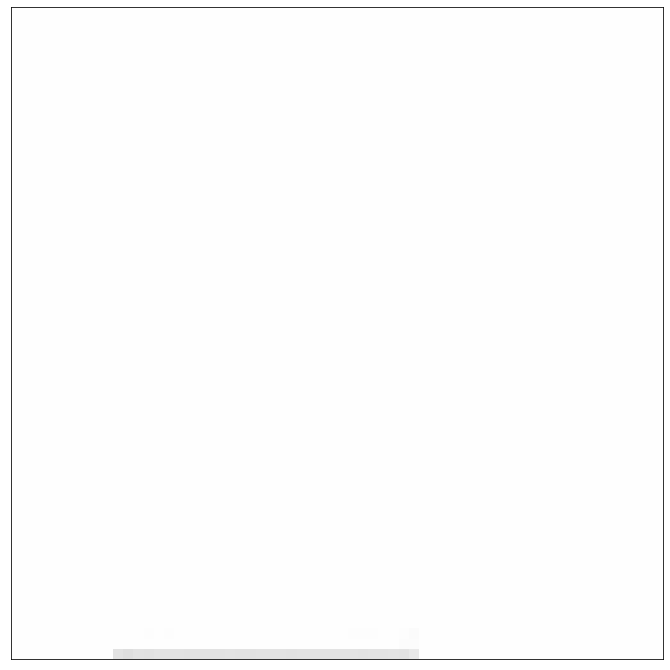

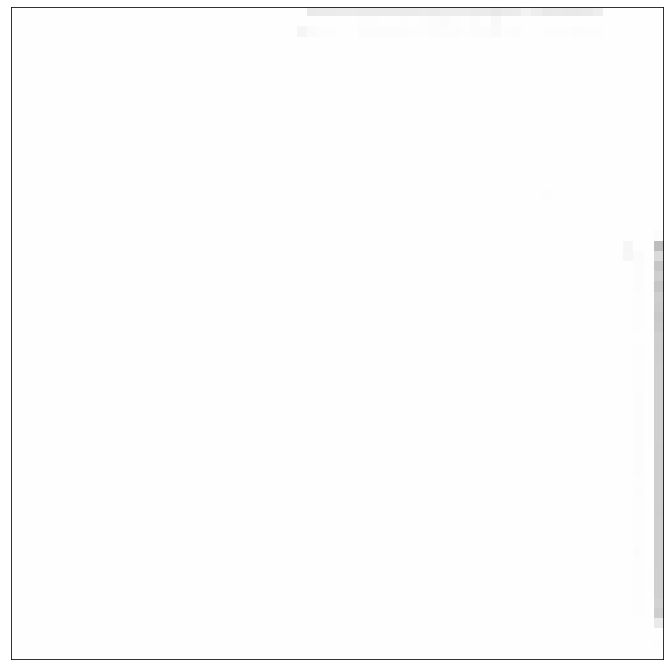

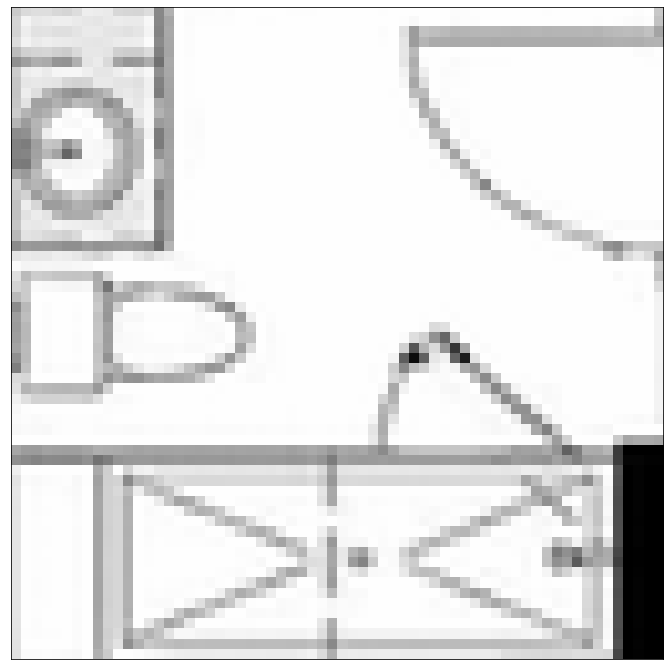

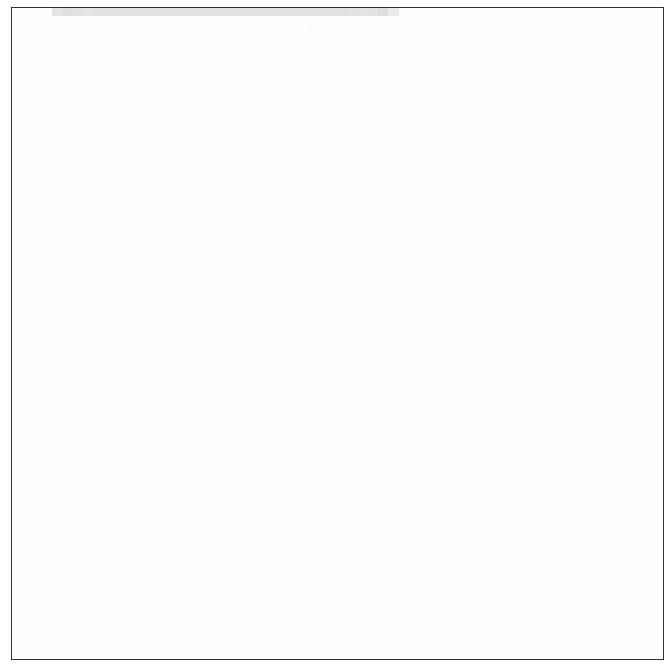

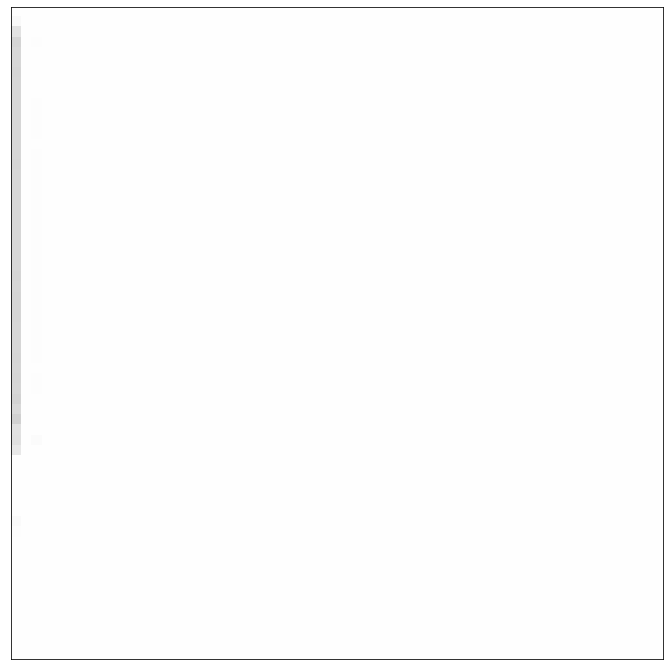

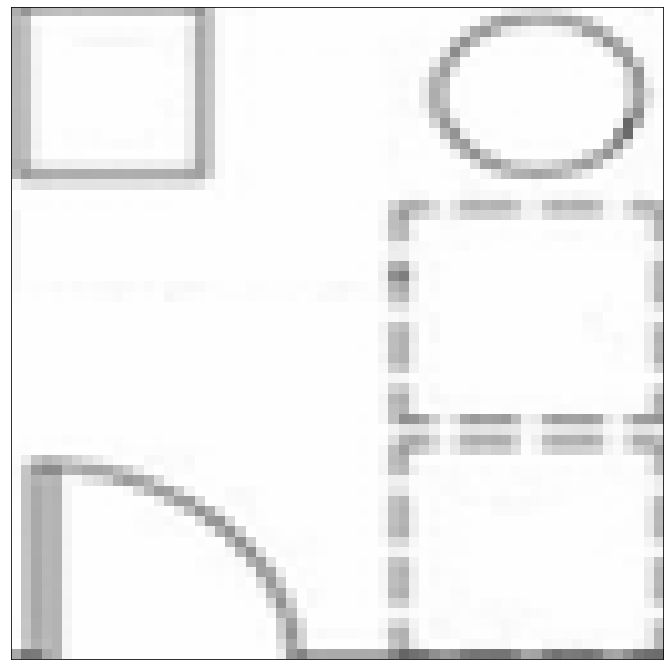

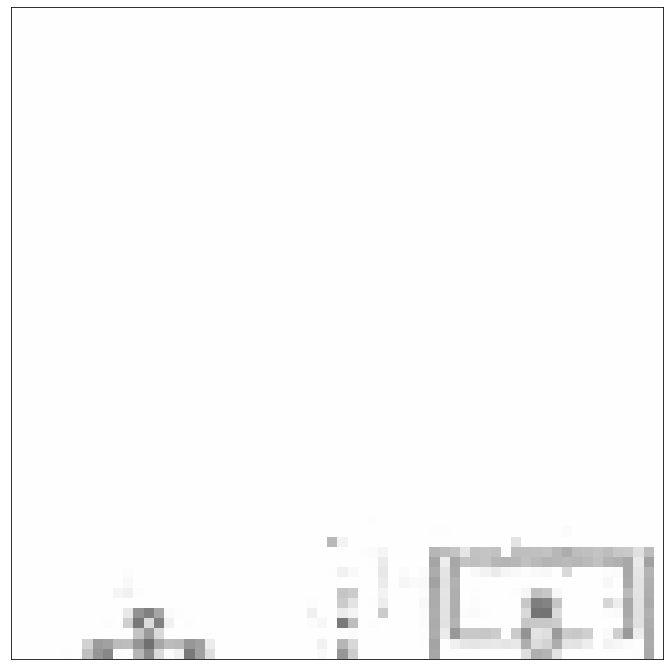

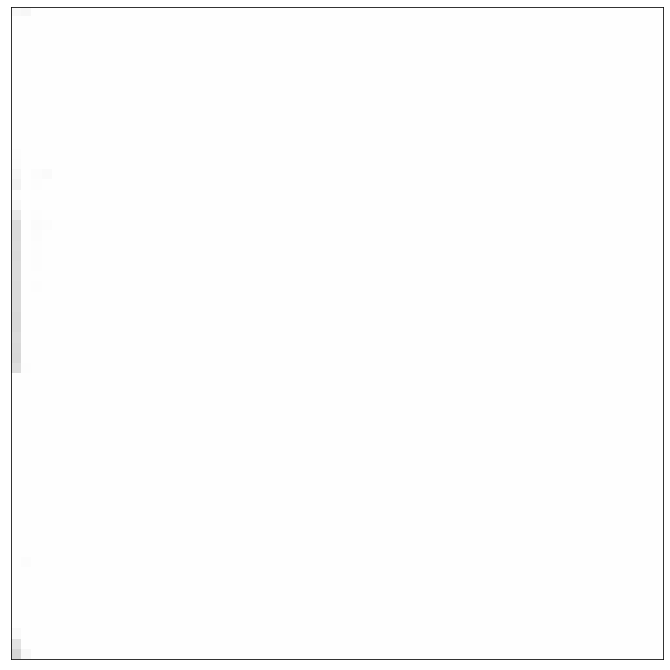

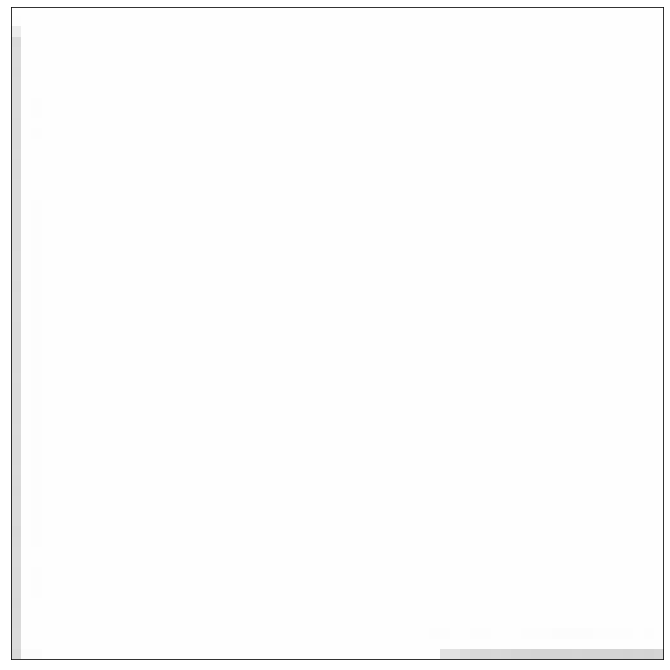

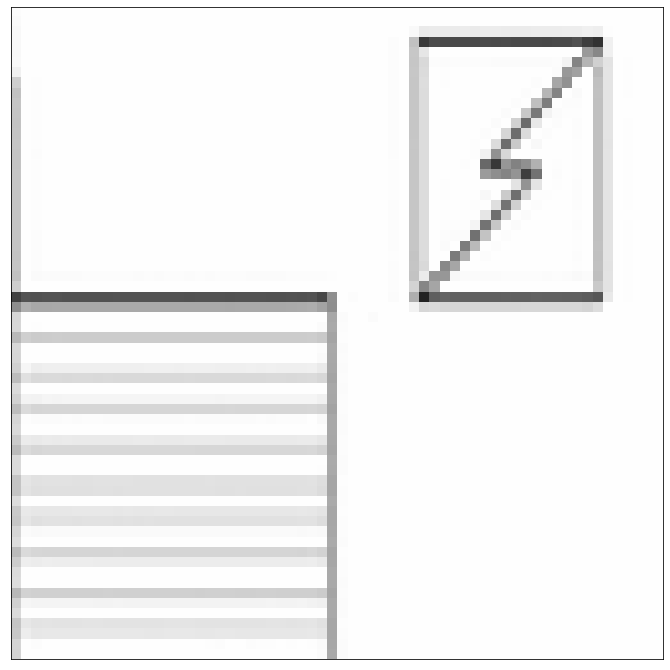

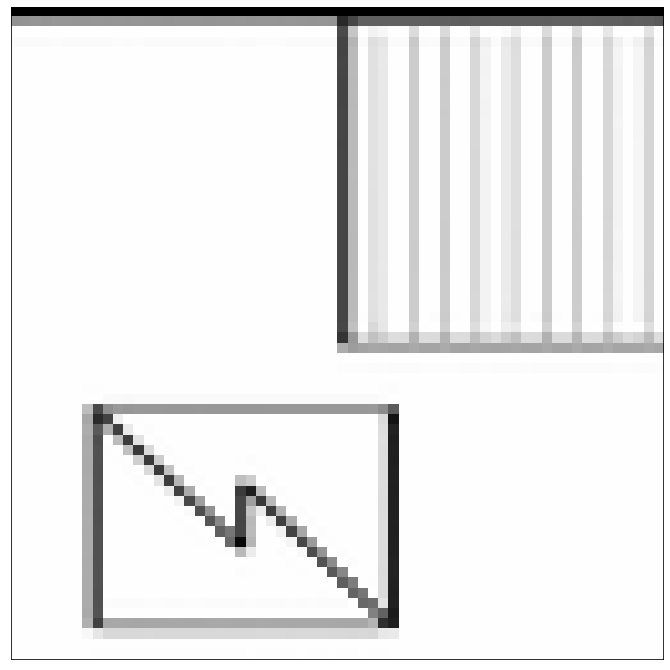

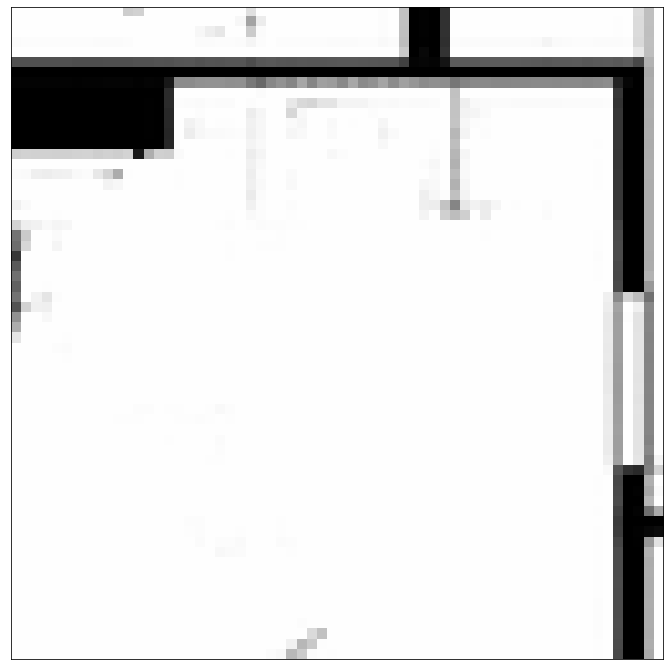

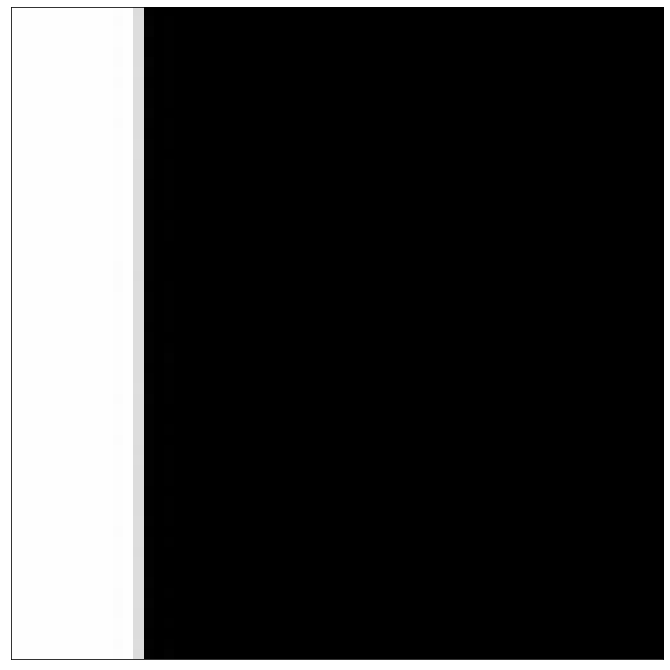

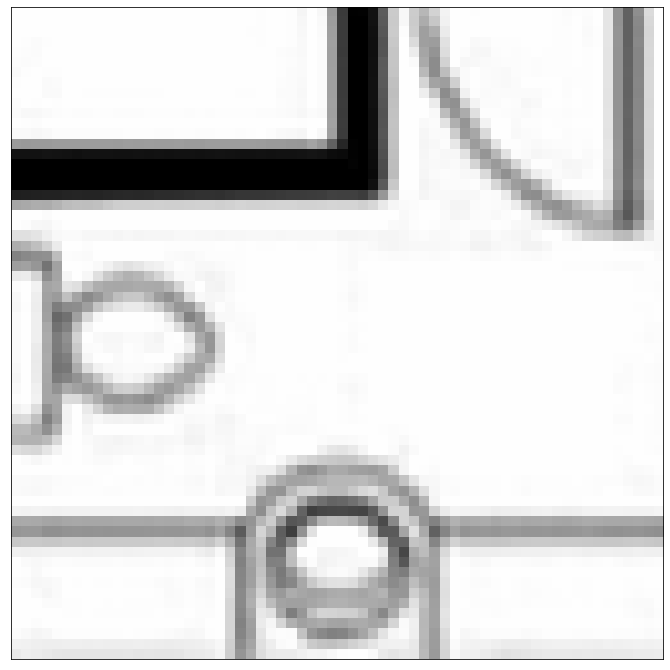

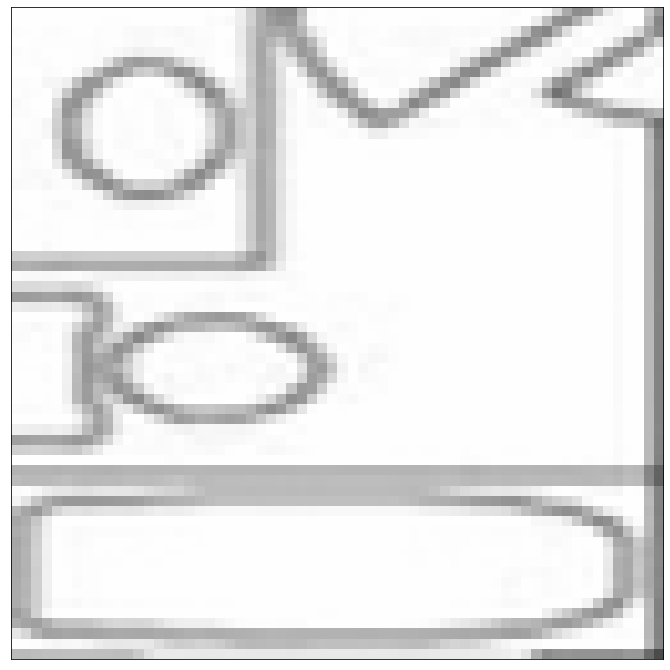

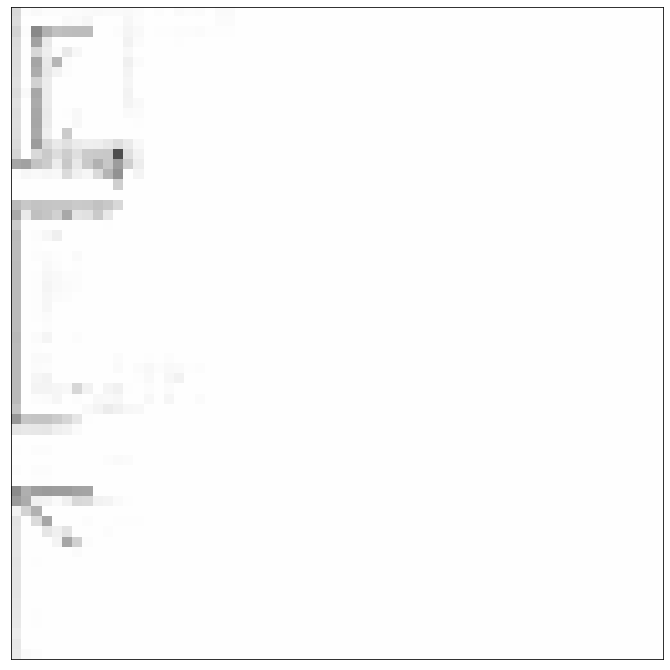

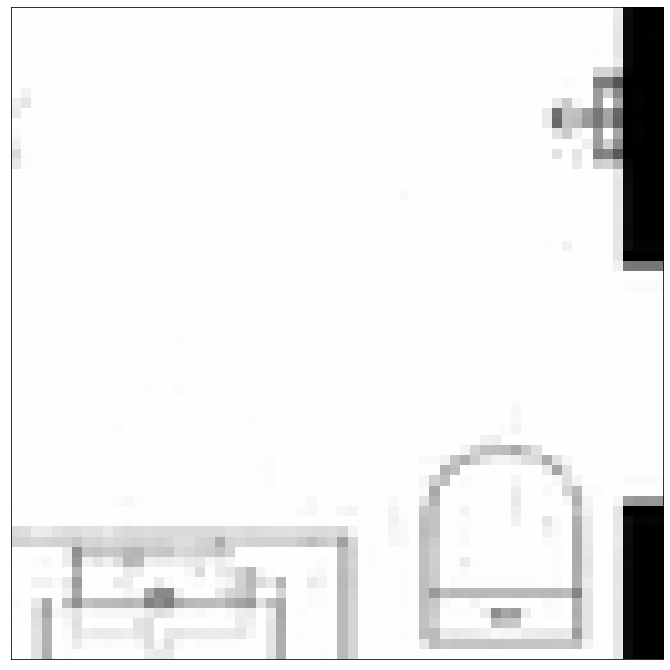

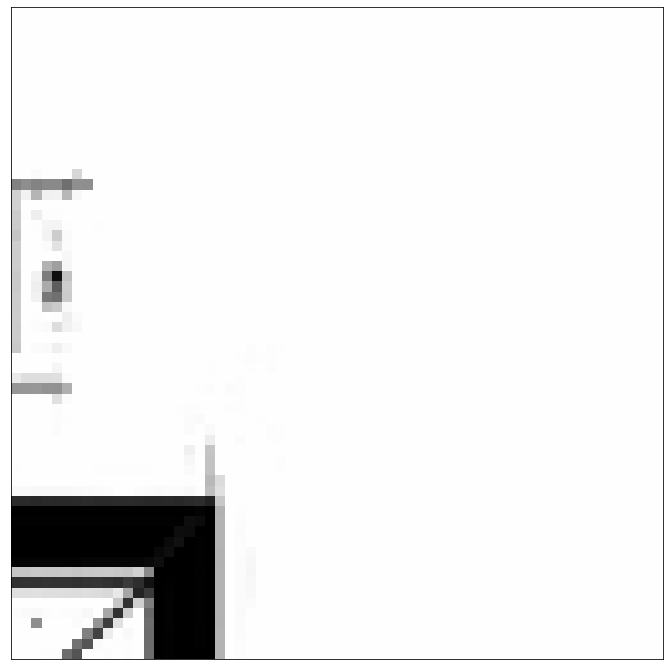

In [ ]:
# generator.cpu()
test_images(0)

In [ ]:
# Save generator outputs
test_dir = "testing"
os.makedirs(test_dir, exist_ok=True)

def test_images(idx, show=True):
    for images, _ in train_loader:
        
        noise = torch.randn(images.shape).to(device)
        # Generate fake images
        gen_input = torch.cat((images, noise[:,0,:,:].unsqueeze(1)), 1)
        generated_images = generator(gen_input)
        fname = "generated-images-{0:0=4d}.png".format(idx)
        save_image(denorm(generated_images), os.path.join(test_dir, fname), nrow=8)
        print("Saving", fname)
        if show:
            show_images(images[42].cpu())
        if show:
            show_images(generated_images.cpu())
        break

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
generator.cpu()

In [ ]:
from matplotlib import cm

for images, _ in train_loader:
        images = images.cpu()
        noise = torch.randn(images.shape)
        # Generate fake images
        gen_input = torch.cat((images, noise[:,0,:,:].unsqueeze(1)), 1)
        generated_images = generator(gen_input).cpu()
        for i in range(generated_images.shape[0]):
            array = generated_images[i].detach().transpose(1,2,0)
            im = Image.fromarray(np.uint8(cm.gist_earth(array)*255))
            break
        break

/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
for in_img, image in train_loader:
    noise = torch.randn(in_img.shape).to(device)
    gen_input = in_img + noise
    out = generator(gen_input)

    print(discriminator(out)[0])
    print(discriminator(image)[0])
    break

tensor([[[0.0653, 0.0636, 0.0647, 0.0653],
         [0.0641, 0.0627, 0.0617, 0.0652],
         [0.0619, 0.0616, 0.0586, 0.0638],
         [0.0634, 0.0657, 0.0633, 0.0652]]], device='cuda:0',
       grad_fn=<SelectBackward>)
tensor([[[1.0284, 1.0231, 1.0242, 1.0277],
         [1.0235, 1.0500, 1.0412, 1.0368],
         [1.0376, 1.0409, 1.0350, 1.0187],
         [1.0493, 1.0516, 1.0409, 1.0293]]], device='cuda:0',
       grad_fn=<SelectBackward>)


/usr/local/lib/python3.7/dist-packages/PIL/Image.py:960: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


In [ ]:
# Ploting losses and scores
plt.plot(history[0], '-')
plt.plot(history[1], '-')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Discriminator', 'Generator'])
plt.title('Losses');

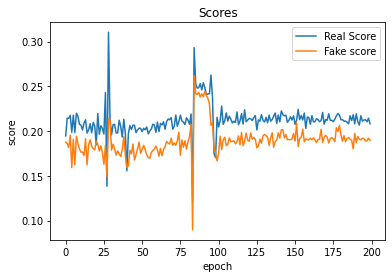

In [ ]:
plt.plot(history[2], '-')
plt.plot(history[3], '-')
plt.xlabel('epoch')
plt.ylabel('score')
plt.legend(['Real Score', 'Fake score'])
plt.title('Scores');

# Testing 

cuda:0
torch.Size([16, 3, 256, 256])
torch.Size([16, 3, 256, 256])


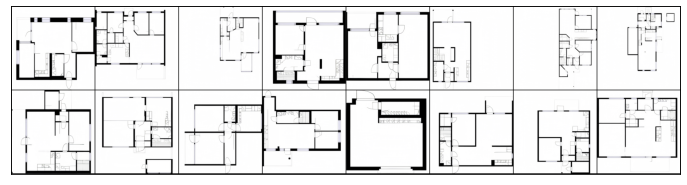

In [ ]:
# Testing Generator
for image, _ in train_loader:
    print(image.device)
    out = generator(image)
    print(out.shape)
    show_images(out.cpu())
    break

In [ ]:
from IPython.display import FileLink
vid_fname = 'training.avi'

files = [os.path.join(generated_dir, f) for f in os.listdir(generated_dir)]
print(len(files))
files.sort()

out = cv2.VideoWriter(vid_fname,cv2.VideoWriter_fourcc(*'MP4V'), 1, (530,530))
[out.write(cv2.imread(fname)) for fname in files]
out.release()

200


# Testing and Visualizing

In [ ]:
!gdown --id 1EgB001_t3VnWZ0nX4BVsJ2nXsnGuDyDH

In [ ]:
!unzip /content/testing_floor.zip

In [ ]:
import cairosvg
!mkdir testing

path = "./testing_floor"
to_path = "./testing"

for dir in os.listdir(path):
    in_svg = os.path.join(path, dir)
    to_save = os.path.join(to_path, dir[:-3]+"png")
    cairosvg.svg2png(
        url=in_svg, write_to=to_save)
    
print("PNGs are Ready")


PNGs are Ready


In [ ]:
!mkdir test 
!mkdir save_test
!mv ./testing ./test

In [ ]:
test_dataset = torchvision.datasets.ImageFolder("./test", transform=Compose([ 
                        tt.Resize((256,256),interpolation=Image.ANTIALIAS),
                        tt.ToTensor()]))

test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=1,
                                           shuffle=True,
                                           num_workers=2,
                                           pin_memory=True)

test_loader = DeviceDataLoader(test_loader, device)

/usr/local/lib/python3.7/dist-packages/torchvision/transforms/transforms.py:258: UserWarning: Argument interpolation should be of type InterpolationMode instead of int. Please, use InterpolationMode enum.
  "Argument interpolation should be of type InterpolationMode instead of int. "


In [ ]:
test_dir = "./save_test"
def save_and_show(idx, show=True, only_one=False):
    for images, _ in test_loader:
        test_images = generator(images)
        test_images = test_images.cpu()
        fname = "test-images-{0:0=4d}.png".format(idx)
        save_image(denorm(test_images), os.path.join(test_dir, fname), nrow=8)
        print("Saving", fname)
        idx+=1
        if show:
            show_images(test_images)
        if only_one:
            return

Saving test-images-0001.png
torch.Size([1, 3, 256, 256])
Saving test-images-0002.png
torch.Size([1, 3, 256, 256])
Saving test-images-0003.png
torch.Size([1, 3, 256, 256])
Saving test-images-0004.png
torch.Size([1, 3, 256, 256])
Saving test-images-0005.png
torch.Size([1, 3, 256, 256])
Saving test-images-0006.png
torch.Size([1, 3, 256, 256])
Saving test-images-0007.png
torch.Size([1, 3, 256, 256])
Saving test-images-0008.png
torch.Size([1, 3, 256, 256])
Saving test-images-0009.png
torch.Size([1, 3, 256, 256])
Saving test-images-0010.png
torch.Size([1, 3, 256, 256])


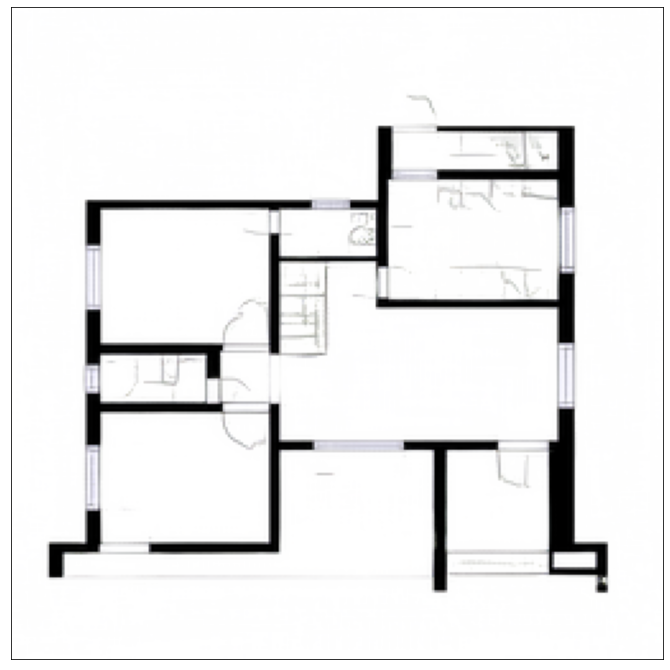

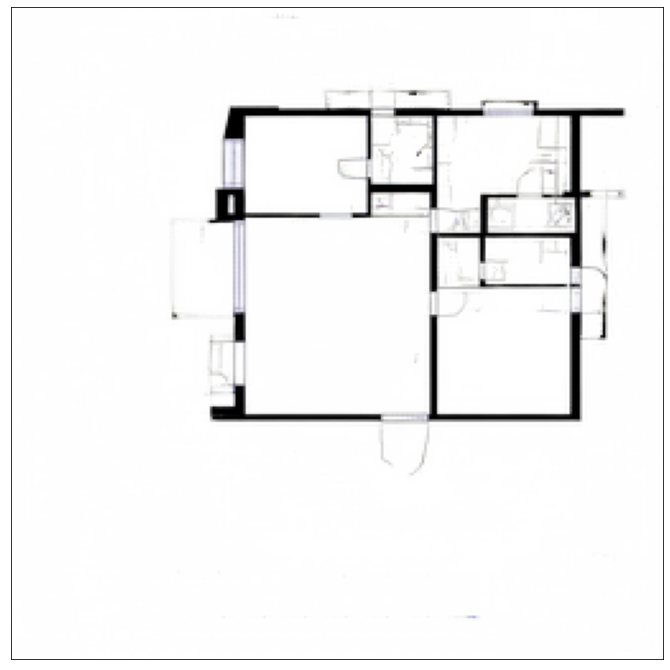

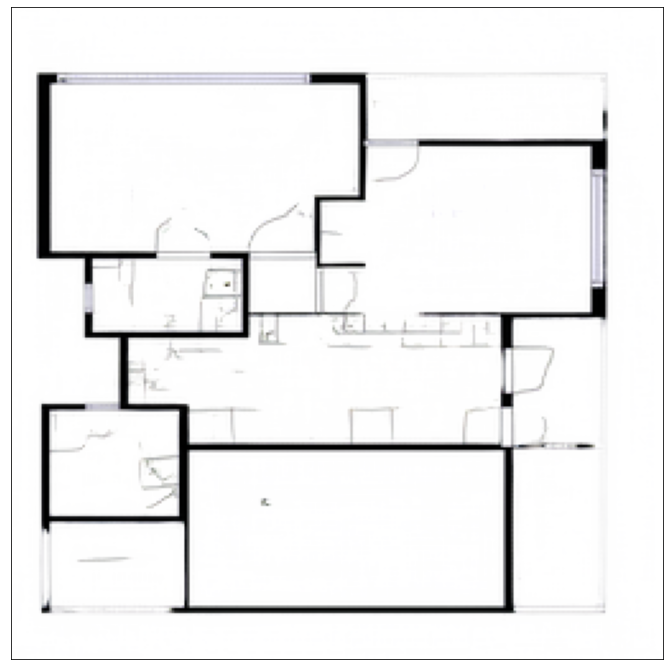

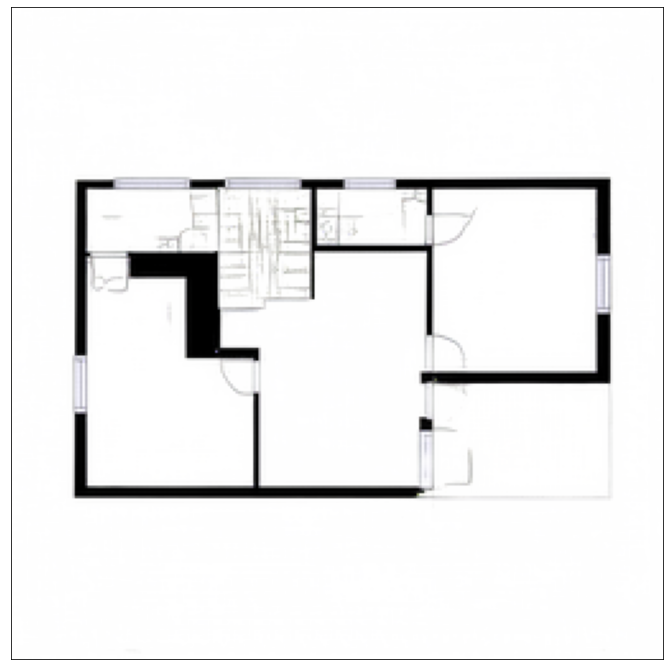

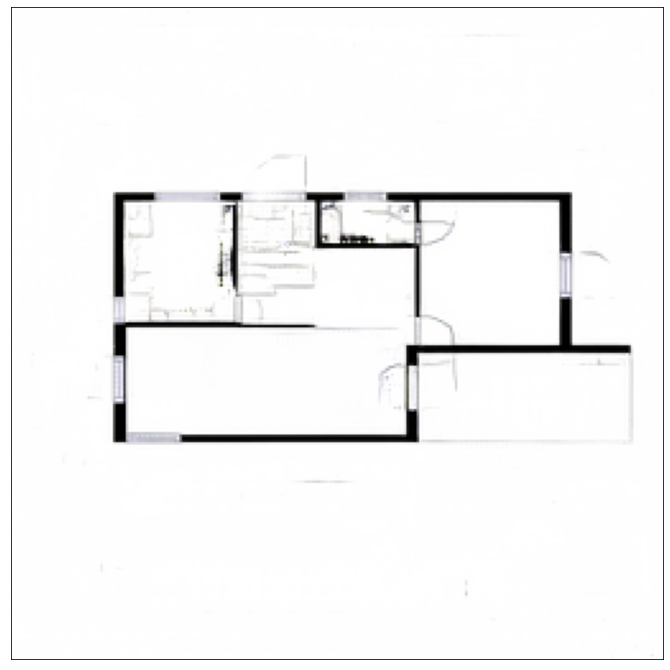

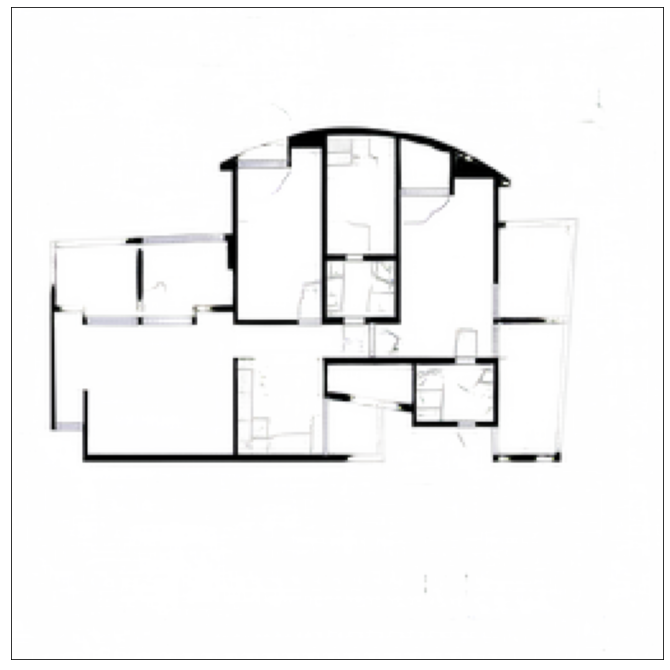

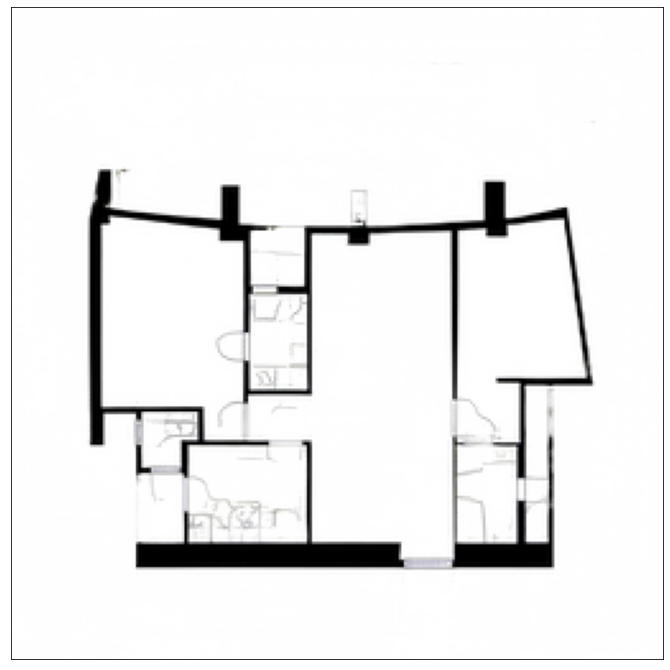

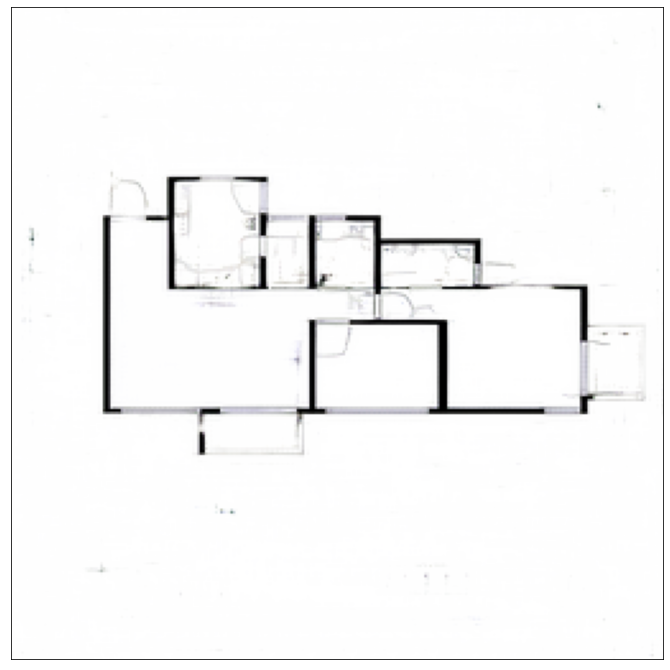

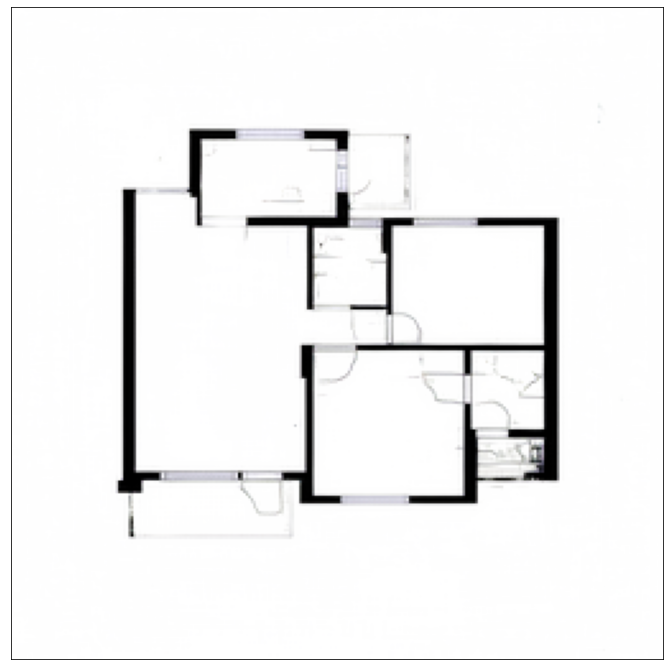

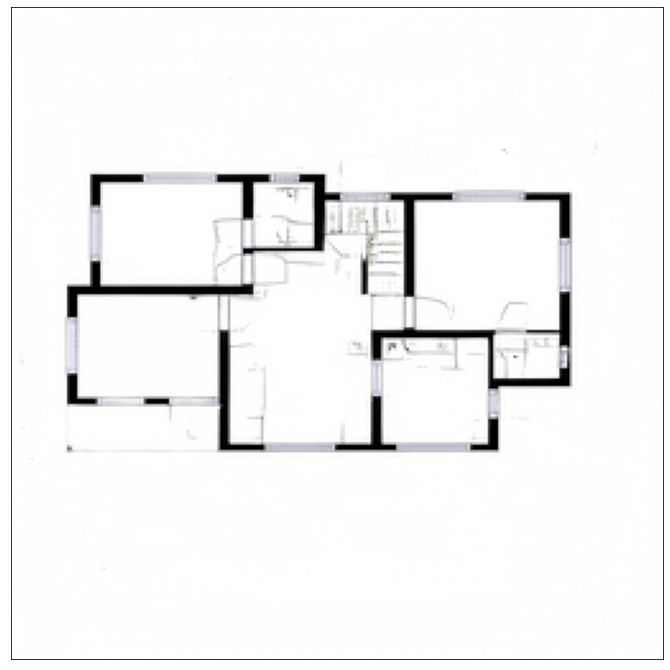

In [ ]:
save_and_show(1,True,False)